# Assignement  Kmeans:


Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be100s), write a function that calculates simple K-means. The expected returned value from the function is 1) a set of cluster id that each point belongs to, and 2) coordinates of centroids at the end of iteration.


Although you can write this in any language, we would recommend for you to use python.Please feel free to research and look up any information you need, but please note plagiarism will not be tolerated.You may spend as much time as needed, but as a frame of reference, an hour would be the maximum time frame. If more time is required, please send over the intermediate code at the one hour mark.


You may start the assignment whenever you are ready. Once you have completed this task, get back to us along with the code and how long it took you.Please feel free to get in touch with me if you encounter any questions or problems.

Requirements:


    Minimum: implementation of the k-means function
    Expected: implement an interface similar to sklearn (subset is fine)
    Bonus: test code Bonus: visualization

Deliverable:


    Can be in any form such as tarball or git repo
    
# What is K mean clustering?

K means clustering is the most popular and widely used unsupervised learning model. It is also called clustering because it works by clustering the data. Unlike supervised learning models, unsupervised models do not use labeled data.    
    
Here is how a k mean clustering algorithm works:

Steps of K means algorithm:

    Choosing the number of clusters"k".
    Randomly choose the "k" centroids and assign each point to a cluster with closest centroid .
    Repeat the following until centroids stop changing:

    For each cluster,compute the cluster centroid by taking the mean vector of the points in the cluster.
    Assign each data point to the cluster for which the centroid is the closest.

# Test Data 

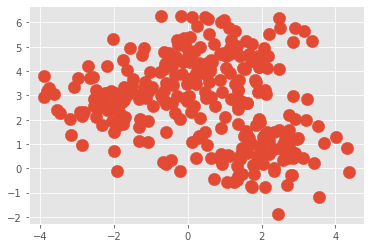

In [62]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('ggplot')
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=0)


plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [63]:
type(X)

numpy.ndarray

# First Approch : 
I took it form the internet : 
they use loops for calculation 

In [64]:
# Import Lib: 
import pandas as pd 
import numpy as np 
import random

class K_Means():
    def __init__(self , N_cluster, data,treshold=0.00001, max_iter=30):
        self.N_cluster= N_cluster
        self.data = data
        self.max_iter = max_iter
        self.treshold= treshold
        self.classifications = {}
        self.centroids = {}
        #self.initial_centroids =create_random_initial_centroids()
        
    @staticmethod
    def get_euclidean_distance(np_0, np_1):
        """
        Static method to calculate the normalized Euclidean distance between any n-dimensional numpy arrays
        """
        return np.linalg.norm(np_0 - np_1)   
    def create_random_initial_centroids(self,data,N_cluster):
        """
        Create random initial centroids based on dataset; creates
        """
        dataset_indices =  np.random.choice(self.data[0], self.N_cluster, replace=False)  
        random_initial_centroids = self.data[dataset_indices]
        random_initial_centroids = np.array(random_initial_centroids)
        return random_initial_centroids 
    def findClosestCentroids(centroids,data):
        assigned_centroid = []
        for i in data:
            distance=[]
            for j in centroids:
                distance.append(get_euclidean_distance(i, j))
            assigned_centroid.append(np.argmin(distance))
        return assigned_centroid
    def calc_centroids(clusters, data):
        new_centroids = []
        new_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns=['cluster'])],
                          axis=1)
        for c in set(new_df['cluster']):
            current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
            cluster_mean = current_cluster.mean(axis=0)
            new_centroids.append(cluster_mean)
        return new_centroids  
    def fit(self,data):
        
        #Randomly choosing Centroids 
        for i in range(self.N_cluster):
            self.centroids[i] = data[i]#Step 1
        #self.centroids= create_random_initial_centroids(self,data,N_cluster)
        for i in range(self.max_iter):

            for i in range(self.N_cluster):
                self.classifications[i] = []
            #finding the distance between centroids and all the data points
            for featureset in data:
                #Centroid with the minimum Distance
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.mean(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.treshold:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

time of excution 0.10900640487670898


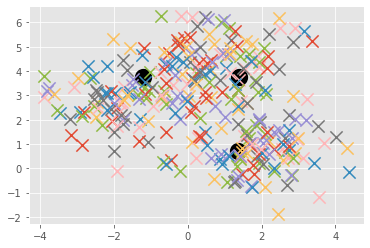

In [103]:
import time
start = time.time()
model = K_Means(N_cluster=3,data=X)
model.fit(X)
end = time.time()
print("time of excution {}".format(end - start))
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    #color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)



###  This class is not optimized  :
Let's use  // compution to accelerate the code 
# Second Approch :
As i have used this function when i claulate document similiarites :
they use // Compution with numpy behind 

In [70]:
from sklearn.metrics import pairwise_distances_argmin
rng = np.random.RandomState(0)
i = rng.permutation(X.shape[0])[:3]
centers = X[i]
# 2a. Assign labels based on closest center
labels = pairwise_distances_argmin(X, centers)
print(labels)

[0 2 1 1 1 1 1 0 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 1 0 1 2 2 1 2
 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 2 1 0 1 1 0 2 2 1 1 2 1 1 2 1 2 1 1 1 1
 2 0 2 1 1 1 1 1 2 1 0 0 2 1 0 1 1 2 1 1 2 2 0 1 1 1 2 1 0 2 1 1 1 1 1 2 1
 1 0 1 1 1 1 0 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 2 0 2 1 1 1 0 1
 1 2 1 1 1 2 1 1 2 2 0 2 0 0 2 0 1 2 1 1 1 1 2 1 1 2 1 2 1 2 0 0 2 1 1 0 1
 1 2 1 1 1 1 0 2 2 1 1 2 1 0 1 2 1 1 1 2 1 1 1 0 2 1 1 1 2 1 1 1 1 1 2 1 1
 2 2 1 1 1 1 2 1 0 2 2 1 2 1 1 1 1 1 2 1 1 0 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 1 0 1 1 0 1 1 2 1 1 2 2 2 1 2 1 1 2 2 1 1 1 2 1 1
 1 2 1 1]


time of excution 0.044002532958984375


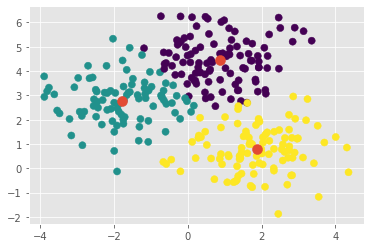

In [96]:
class K_Means_Speed():
    def __init__(self , N_cluster, data):
        self.N_cluster= N_cluster
        self.data = data
        
    def fit(self,data):
        # 1. Randomly choose clusters
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:self.N_cluster]
        centers = self.data[i]

        while True:
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(self.data, centers)

            # 2b. Find new centers from means of points
            new_centers = np.array([self.data[labels == i].mean(0) for i in range(self.N_cluster)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers

        return centers, labels

    def predict(self,data):
        labels = pairwise_distances_argmin(self.data, centers)
        return labels
start = time.time()
K_M =K_Means_Speed(N_cluster=3,data=X)
centers, labels = K_M.fit(X)
end = time.time()
print("time of excution {}".format(end - start))
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],s=100, cmap='red')


# Predict new points : 

In [91]:
labels = K_M.predict(X)
print(labels)

[0 2 0 1 1 1 0 0 1 0 2 2 2 0 2 1 0 0 0 2 1 0 2 0 1 1 1 1 2 2 1 0 0 2 2 1 2
 2 0 2 1 2 0 2 2 1 2 1 1 2 1 0 1 1 2 0 0 1 1 0 2 2 0 1 2 1 0 2 0 2 1 0 1 1
 2 0 2 1 0 0 1 0 2 0 0 0 2 1 0 0 1 2 1 0 2 2 0 2 1 0 2 0 0 2 0 0 1 0 2 2 0
 1 0 0 1 1 0 0 2 2 2 1 2 2 2 1 2 2 2 1 1 1 2 1 1 2 1 0 1 1 2 0 2 0 1 1 0 1
 1 2 0 1 0 2 1 1 2 2 0 2 0 0 2 0 1 2 0 0 1 1 2 0 0 2 2 2 0 2 0 0 2 1 0 0 0
 1 2 1 0 1 0 0 2 2 1 0 2 1 0 1 2 1 0 1 2 1 0 1 0 2 0 0 1 2 2 0 2 0 2 2 2 1
 2 2 0 1 1 0 2 0 0 2 2 0 2 1 1 2 1 0 2 1 1 1 1 2 0 1 0 2 2 0 2 2 1 0 2 1 0
 0 1 0 1 1 1 1 0 2 2 2 2 0 0 0 0 0 1 1 2 0 0 2 2 2 1 2 1 1 2 2 1 1 0 2 0 0
 0 2 0 0]



## The scikit-learn approach

In [101]:
from sklearn.cluster import KMeans
start = time.time()
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
end = time.time()
print("time of excution {}".format(end - start))

time of excution 0.2540144920349121


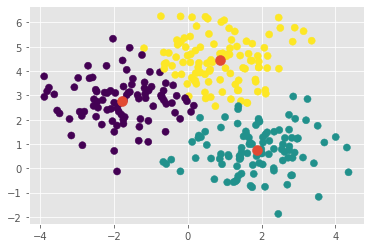

In [102]:
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],s=100, cmap='red')

# 3 Approch :
This Reasearch took more than 3 hours 
Using open source solution: 
1. The objectif of Data scientist/ML engnieer  is to exctract value from data and be more efficient as possible :
So using all open source code is the first step to do .
2. if you don' find your solution , there you should implement it from scratch 
"It's my point of vue in order to be more efficient in job "

time of excution 0.11551499366760254
centroids are : [[ 0.86099822  4.45681748]
 [-1.78246565  2.78528143]
 [ 1.86930473  0.78120157]]
first point:[0.06344785 5.42080362] and the prediction cluster  is :0


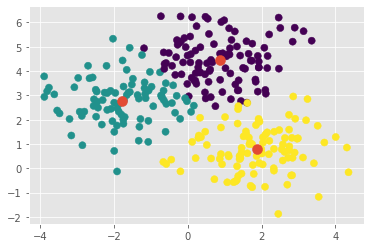

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import style
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs

class K_Means_Speed():
    def __init__(self , N_cluster, data):
        self.N_cluster= N_cluster
        self.data = data
        
    def fit(self,data):
        # 1. Randomly choose clusters
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:self.N_cluster]
        centers = self.data[i]

        while True:
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(self.data, centers)

            # 2b. Find new centers from means of points
            new_centers = np.array([self.data[labels == i].mean(0) for i in range(self.N_cluster)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers

        return centers, labels

    def predict(self,data):
        labels = pairwise_distances_argmin(self.data, centers)
        return labels
if __name__ == '__main__':
	X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=0)
	start = time.time()
	K_M =K_Means_Speed(N_cluster=3,data=X)
	centers, labels = K_M.fit(X)
	end = time.time()
	print("time of excution {}".format(end - start))
	print('centroids are : {}'.format(centers))
	print('first point:{} and the prediction cluster  is :{}'.format(X[0],labels[0]))
	fig = plt.figure() 
	plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
	plt.scatter(centers[:, 0], centers[:, 1],s=100, cmap='red')
	fig.savefig('Kmeans_test.png')
	plt.show()